[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W13/W13P4.ipynb)



In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels

In [ ]:
def download_data():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/Tedu_Time_Series/main/W13/icep3.csv"
  res = requests.get(url, allow_redirects=True)
  with open('icep3.csv','wb') as file:
    file.write(res.content)

download_data()

In [51]:
data = pd.read_csv("icep3.csv")["interest"]
data = data.apply(lambda x: np.log(x))

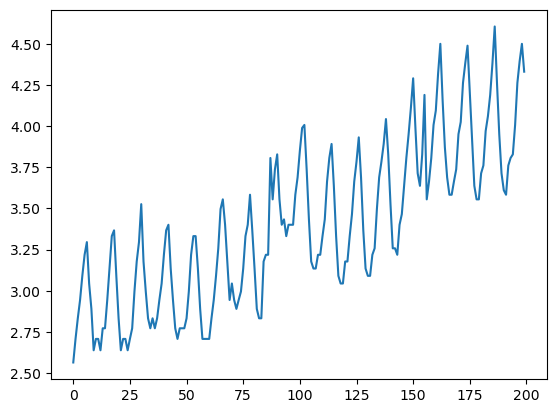

In [52]:
plt.plot(data)
plt.show()

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

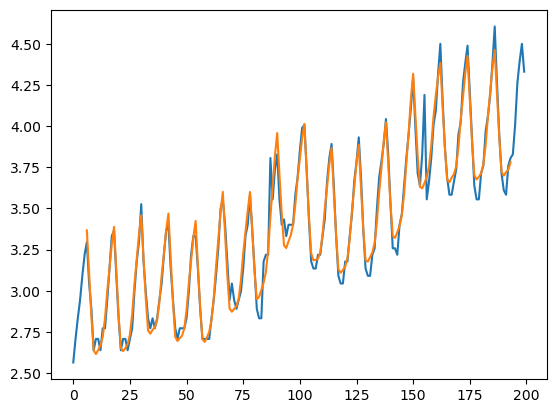

In [53]:
ts = sd(data, period = 12)
plt.plot(data)

plt.plot(ts.seasonal+ts.trend)
plt.show()

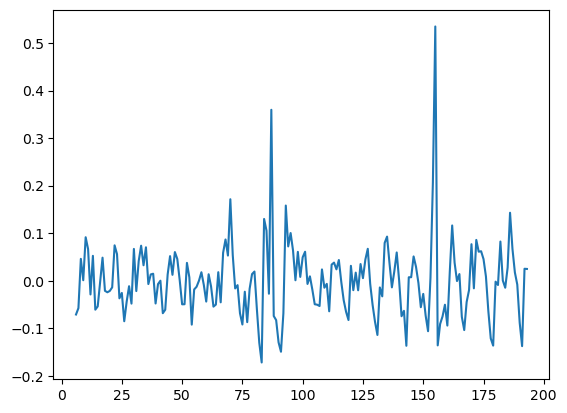

In [54]:
plt.plot(ts.resid)

In [55]:
## This method only works when you work with residuals!!!!

In [57]:
np.mean(ts.resid), np.std(ts.resid)

(-4.2717755118773104e-05, 0.07911766592738323)

In [59]:
normalized_res = (ts.resid - ts.resid.mean())/ts.resid.std(ddof = 1)

In [79]:
ts_ = np.where(abs(normalized_res) > 1.5)[0]

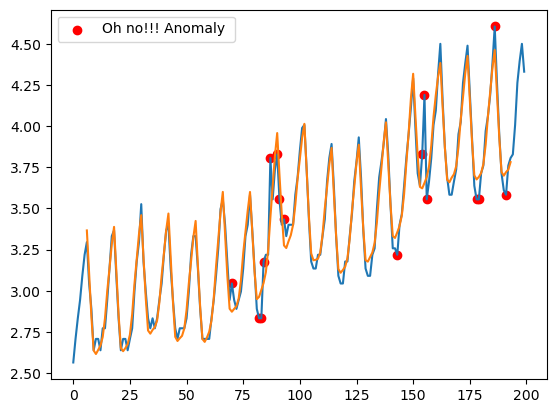

In [81]:
plt.plot(data)
plt.plot(ts.seasonal+ts.trend)
plt.scatter(ts_, data[ts_], color = "red", label = "Oh no!!! Anomaly ")
plt.legend()
plt.show()

In [82]:
## Seasonality here is important because we used decomposition!!!! otherwise we could have deseasonilize the series!!!